# **Hand Written Digit Prediction-Classification Analysis**

-------------

## **Objective**
The objective is to predict the number that the image represents using a machine learning model

## **Data Source**
Data source is the digits dataset found in the sci-kit learn library

## **Import Library**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## **Import Data**

In [3]:
from sklearn.datasets import load_digits
df = load_digits()

## **Describe Data**

In [7]:
dir(df)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [10]:
pd.DataFrame(df.data).head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [11]:
pd.DataFrame(df.data).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 64 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1797 non-null   float64
 1   1       1797 non-null   float64
 2   2       1797 non-null   float64
 3   3       1797 non-null   float64
 4   4       1797 non-null   float64
 5   5       1797 non-null   float64
 6   6       1797 non-null   float64
 7   7       1797 non-null   float64
 8   8       1797 non-null   float64
 9   9       1797 non-null   float64
 10  10      1797 non-null   float64
 11  11      1797 non-null   float64
 12  12      1797 non-null   float64
 13  13      1797 non-null   float64
 14  14      1797 non-null   float64
 15  15      1797 non-null   float64
 16  16      1797 non-null   float64
 17  17      1797 non-null   float64
 18  18      1797 non-null   float64
 19  19      1797 non-null   float64
 20  20      1797 non-null   float64
 21  21      1797 non-null   float64
 22  

## **Data Visualization**

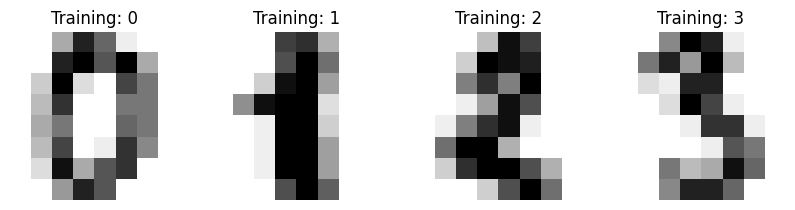

In [6]:
_, axes = plt.subplots(nrows=1,ncols=4,figsize=(10,3))
for ax, image, label in zip(axes, df.images, df.target):
    ax.set_axis_off()
    ax.imshow(image,cmap=plt.cm.gray_r,interpolation='nearest')
    ax.set_title("Training: %i" % label)

## **Data Preprocessing**

**Flatten Image**

In [12]:
df.images.shape

(1797, 8, 8)

In [13]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [14]:
df.images[0].shape

(8, 8)

In [15]:
len(df.images)

1797

In [16]:
n_samples = len(df.images)
data = df.images.reshape((n_samples),-1)

In [17]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [18]:
data[0].shape

(64,)

In [19]:
data.shape

(1797, 64)

**Scaling Image Data**

In [20]:
data.min()

0.0

In [21]:
data.max()

16.0

In [22]:
data = data/16

In [23]:
data.min()

0.0

In [24]:
data.max()

1.0

In [25]:
data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

## **Define Target Variable (y) and Feature Variables (X)**

In [26]:
X=data
y=df.target

## **Train Test Split**

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [28]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

## **Modeling**

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [33]:
y_pred = rf.predict(X_test)

## **Model Evaluation**

In [35]:
from sklearn.metrics import confusion_matrix, classification_report

In [36]:
confusion_matrix(y_test,y_pred)

array([[50,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 56,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 45,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 63,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 53,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 48,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 67,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 51,  1,  1],
       [ 0,  3,  1,  0,  0,  0,  0,  0, 46,  1],
       [ 0,  0,  0,  1,  0,  0,  0,  1,  1, 50]], dtype=int64)

In [37]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.95      1.00      0.97        56
           2       0.98      1.00      0.99        45
           3       0.98      1.00      0.99        63
           4       0.98      1.00      0.99        53
           5       1.00      1.00      1.00        48
           6       1.00      1.00      1.00        67
           7       0.98      0.94      0.96        54
           8       0.96      0.90      0.93        51
           9       0.96      0.94      0.95        53

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540



## **Prediction**

In [32]:
y_pred

array([6, 7, 4, 8, 9, 7, 1, 9, 6, 6, 1, 0, 6, 0, 2, 9, 3, 1, 9, 5, 8, 4,
       2, 3, 0, 4, 9, 3, 3, 0, 0, 2, 9, 4, 7, 7, 5, 3, 6, 3, 7, 2, 5, 1,
       4, 0, 5, 9, 9, 4, 2, 5, 1, 5, 6, 9, 3, 4, 1, 3, 3, 9, 8, 6, 7, 8,
       8, 4, 6, 6, 1, 9, 9, 6, 0, 1, 2, 1, 3, 6, 7, 6, 3, 9, 7, 1, 7, 8,
       0, 5, 5, 9, 9, 2, 1, 4, 0, 1, 3, 3, 9, 3, 7, 0, 5, 5, 2, 0, 1, 5,
       8, 3, 8, 6, 1, 6, 3, 2, 6, 4, 2, 5, 7, 0, 1, 7, 2, 1, 9, 6, 6, 9,
       6, 3, 5, 6, 5, 4, 0, 3, 6, 1, 6, 0, 8, 8, 9, 8, 1, 9, 6, 4, 5, 4,
       9, 1, 1, 9, 0, 4, 6, 7, 1, 3, 1, 9, 2, 8, 4, 4, 8, 1, 3, 3, 6, 3,
       0, 4, 1, 9, 4, 9, 5, 7, 1, 6, 6, 1, 3, 2, 2, 2, 3, 0, 9, 8, 0, 3,
       7, 3, 2, 1, 6, 6, 3, 6, 4, 5, 9, 2, 4, 6, 8, 9, 5, 1, 8, 1, 9, 2,
       3, 6, 0, 8, 7, 5, 1, 7, 0, 4, 6, 3, 8, 3, 6, 4, 1, 5, 7, 3, 6, 5,
       0, 4, 7, 1, 4, 8, 7, 7, 6, 6, 3, 5, 1, 8, 8, 1, 9, 4, 3, 5, 8, 2,
       7, 9, 2, 8, 3, 1, 3, 4, 7, 4, 0, 5, 6, 8, 4, 5, 4, 5, 7, 0, 4, 1,
       8, 8, 3, 4, 4, 3, 3, 0, 2, 3, 0, 9, 0, 9, 5,

## **Explaination**

The RandomForest model was successfully constructed and achieved an accuracy of 98% in predicting the digits